# WEB SCRAPING AND DATA ANALYSIS OF IMDB TOP 1000 MOVIES FROM 1921 TO 2021

In [1]:
pip install selenium


Note: you may need to restart the kernel to use updated packages.


In [628]:
from selenium import webdriver
import time

In [629]:
PATH = "C:\Program Files (x86)\chromedriver.exe"

In [630]:
driver = webdriver.Chrome(PATH)

In [653]:
from selenium import webdriver
import time
from selenium.webdriver.common.action_chains import ActionChains
PATH = "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)
for i in range(10):
    driver.get(f"https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start={i}01&ref_=adv_nxt")
    action = ActionChains(driver)
    add_title()
    add_year()
    add_duration()
    add_genre()
    add_rating()
    add_metascore()
    add_overview()
    add_director()
    add_image_url()
    add_votes()
    next = driver.find_element_by_link_text("Next »")
    action.click(next)
    action.perform()
    time.sleep(1)
driver.close()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"link text","selector":"Next »"}
  (Session info: chrome=90.0.4430.212)


In [679]:
title_name = []
year = []
duration = []
genre = []
rating = []
overview = []
director = []
image_url = []
votes = []


In [651]:

def add_title():
    title = driver.find_elements_by_class_name('lister-item-header')
    for i in title:
        title_name.append(i.find_element_by_tag_name('a').text)

def add_year():
    yr = driver.find_elements_by_class_name('lister-item-year ')
    for i in yr:
        y = int(i.text.replace('(',"").replace(')',"").split()[-1])
        year.append(y)


def add_duration():
    dur = driver.find_elements_by_class_name('runtime')
    for i in dur:
        duration.append(int(i.text.split()[0]))

def add_genre():
    gen = driver.find_elements_by_class_name('genre')
    for i in gen:
        genre.append(i.text)

def add_rating():
    rat = driver.find_elements_by_class_name('ratings-bar')
    for i in rat:
        rating.append(float(i.find_element_by_tag_name('strong').text))


def add_overview():
    over = driver.find_elements_by_class_name("lister-item-content")
    for i in over:
        overview.append(i.find_elements_by_tag_name("p")[1].text)

def add_director():
    dir = driver.find_elements_by_class_name("lister-item-content")
    for i in dir:
        director.append(i.find_elements_by_tag_name("p")[2].find_element_by_tag_name("a").text)


def add_votes():
    vot = driver.find_elements_by_class_name("sort-num_votes-visible")
    for i in vot:
        votes.append(int(i.find_elements_by_name("nv")[0].text.replace(',',"")))

def add_image_url():
    img = driver.find_elements_by_class_name('lister-item-image')
    for i in img:
        image_url.append(i.find_element_by_tag_name("img").get_attribute("src"))


In [172]:
import pandas as pd


In [676]:
movie_dict = {
"movie-name":title_name,
"year":year,
"duration(min)":duration,
"genre":genre,
"rating":rating,
"overview":overview,
"director":director,
"image_url": image_url,
"votes":votes
}

In [677]:
Movie_df = pd.DataFrame(movie_dict)

In [682]:
Movie_df.to_csv("IMDB-Movies-top-1k.csv" , index=None)


# DATA ANALYSIS

# BASIC INSTALLATION OF LIBRARIES 

In [46]:
import pandas as pd
from IPython.core.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READING THE DATASET (CSV) USING PANDAS

In [47]:
df_imdb =pd.read_csv('IMDB-Movies-top-1k.csv')

# INTRODUCTORY ANALYSIS OF DATASET


In [48]:
df_imdb.head()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2396103
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1659703
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,79558
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2357666
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,https://m.media-amazon.com/images/S/sash/4Fyxw...,1153712


In [641]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="120" >'
df_imdb.to_html(escape=False, formatters=dict(image_url=path_to_image_html))
HTML(df_imdb.to_html(escape=False,formatters=dict(image_url=path_to_image_html))).

SyntaxError: invalid syntax (<ipython-input-641-2cebde912dda>, line 4)

In [50]:
df_imdb.columns

Index(['movie-name', 'year', 'duration(min)', 'genre', 'rating', 'overview',
       'director', 'image_url', 'votes'],
      dtype='object')

In [51]:
df_imdb.shape

(1000, 9)

In [52]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie-name     1000 non-null   object 
 1   year           1000 non-null   int64  
 2   duration(min)  1000 non-null   int64  
 3   genre          1000 non-null   object 
 4   rating         1000 non-null   float64
 5   overview       1000 non-null   object 
 6   director       1000 non-null   object 
 7   image_url      1000 non-null   object 
 8   votes          1000 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [53]:
df_imdb.describe()

,year,duration(min),rating,votes
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1991.238000,122.998000,7.953900,2.792805e+05
std,23.403014,28.221028,0.275936,3.345355e+05
min,1920.000000,45.000000,7.600000,2.522100e+04
25%,1976.000000,103.000000,7.700000,5.580225e+04
50%,1999.000000,119.000000,7.900000,1.416020e+05
75%,2010.000000,137.000000,8.100000,3.813432e+05
max,2021.000000,321.000000,9.300000,2.396103e+06


# CHECK FOR MISSING DATA 

In [54]:
df_imdb.isnull()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [55]:
df_imdb[df_imdb.isnull().any(axis=1)]

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes


# TITLE ANALYSIS

# YEAR ANALYSIS

In [56]:
year_of_release = df_imdb['year']
year_of_release

0      1994
1      1972
2      2020
3      2008
4      1974
       ... 
995    1961
996    1956
997    1953
998    1953
999    1944
Name: year, Length: 1000, dtype: int64

### graph of year and number of movies

In [57]:
no_movie_years = df_imdb.year.value_counts().sort_index(ascending=False)
no_movie_years

2021     2
2020     7
2019    24
2018    20
2017    22
        ..
1925     2
1924     1
1922     1
1921     1
1920     1
Name: year, Length: 100, dtype: int64

In [58]:
from matplotlib import rcParams

Text(0, 0.5, 'no of movies')

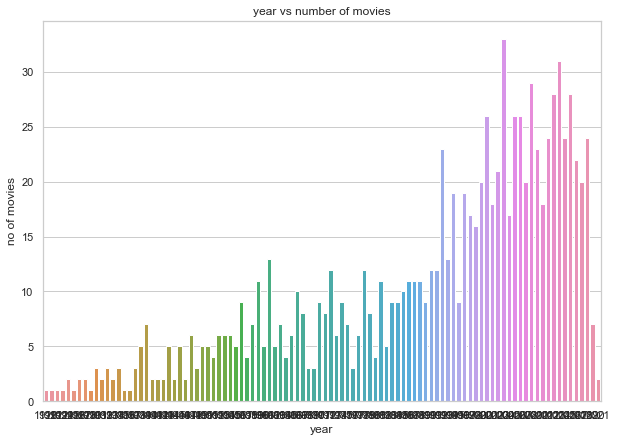

In [59]:
    sns.barplot(x=df_imdb.year.value_counts().index , y=df_imdb.year.value_counts())
    plt.title("year vs number of movies")
    plt.xlabel("year")
    plt.ylabel("no of movies")

## function for graph number of movie vs year

In [60]:
def graph_for_movies_number_in_each_year(i,j):
    x_axis = df_imdb.year.value_counts().sort_index().index[i:j]
    y_axis = df_imdb.year.value_counts().sort_index()[i:j]
    sns.barplot(x=x_axis , y=y_axis);
    plt.title("year vs number of movies")
    plt.xlabel("year")
    plt.ylabel("no of movies")
    rcParams['figure.figsize'] = (10,7)
    sns.set_theme(style="whitegrid")
    

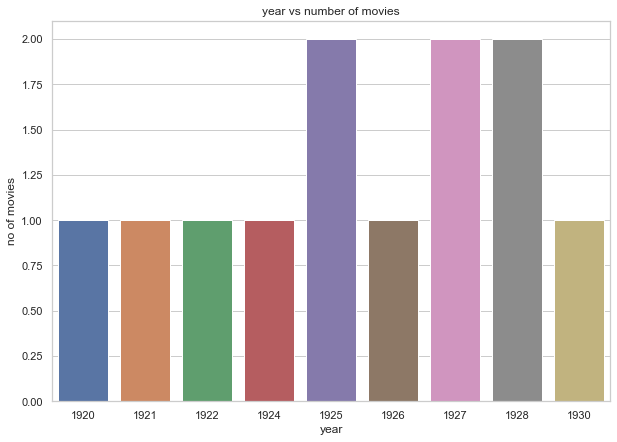

In [61]:
graph_for_movies_number_in_each_year(0,9)

## LAST 10 YEARS DATA  

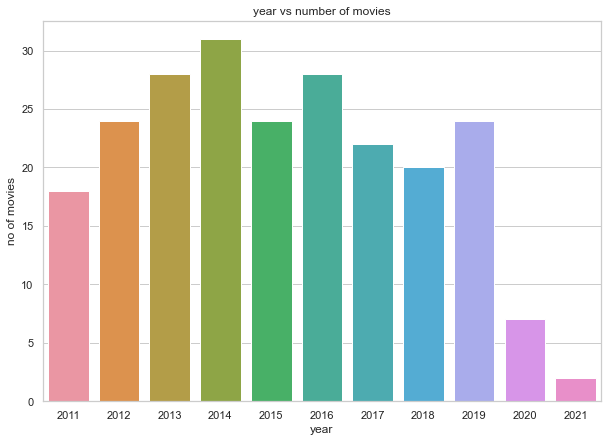

In [62]:
graph_for_movies_number_in_each_year(89,101)

Text(0.5, 1.0, 'LAST TEN YEAR MOVIES WITH %')

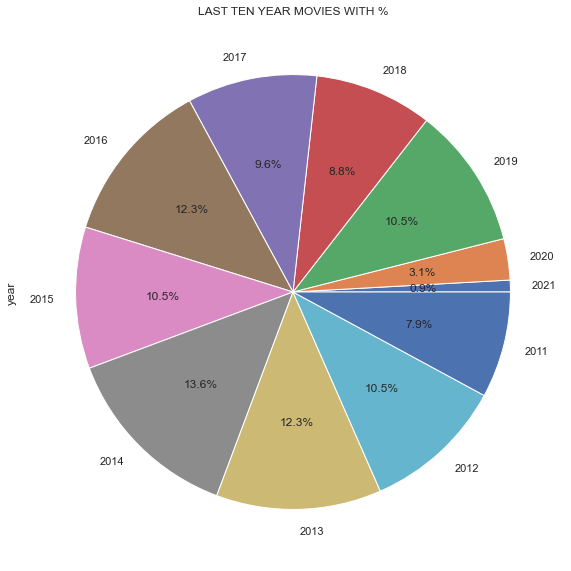

In [73]:
df_imdb.year.value_counts().sort_index(ascending=False)[:11].plot.pie(autopct='%1.1f%%' , figsize=(10,10))
plt.title('LAST TEN YEAR MOVIES WITH %')

## top 10 years with the most number of movie released

In [74]:
df_imdb.year.value_counts().head(10)

2004    33
2014    31
2009    29
2016    28
2013    28
2006    26
2007    26
2001    26
2015    24
2012    24
Name: year, dtype: int64

<AxesSubplot:>

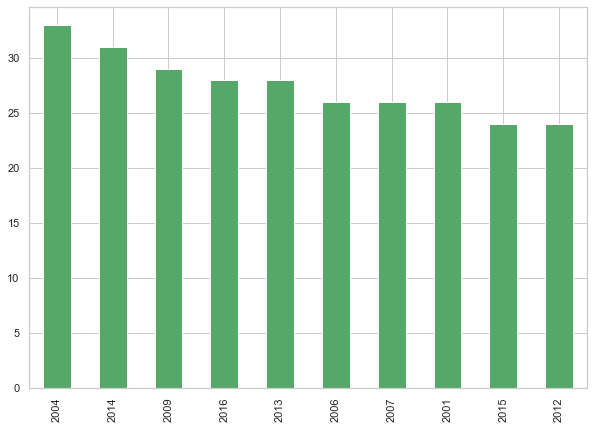

In [75]:
df_imdb.year.value_counts().head(10).plot.bar(color="g")

<AxesSubplot:ylabel='year'>

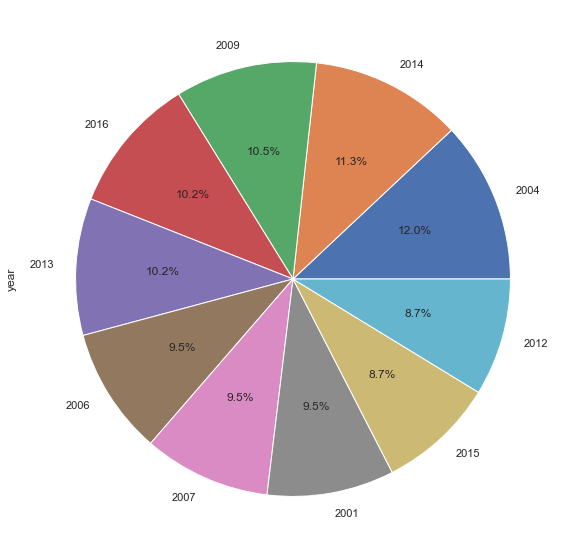

In [76]:
df_imdb.year.value_counts().head(10).plot.pie(autopct='%1.1f%%' , figsize=(10,10))

## MOVIES LIST OF THE YEAR HAVING THE MOST NUMBER OF MOVIES

In [77]:
df_imdb.year.value_counts().sort_values(ascending=False).head(1)

2004    33
Name: year, dtype: int64

#### INSIGHTS
- Year 2004 has the most number of movies 
- 33 movies has been released in that year

In [78]:
df_imdb[df_imdb['year']==2004]

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
95,Eternal Sunshine of the Spotless Mind,2004,108,"Drama, Romance, Sci-Fi",8.3,"When their relationship turns sour, a couple u...",Michel Gondry,https://m.media-amazon.com/images/S/sash/4Fyxw...,927801
157,Swades,2004,189,Drama,8.2,A successful Indian scientist returns to an In...,Ashutosh Gowariker,https://m.media-amazon.com/images/S/sash/4Fyxw...,84879
158,Downfall,2004,156,"Biography, Drama, History",8.2,"Traudl Junge, the final secretary for Adolf Hi...",Oliver Hirschbiegel,https://m.media-amazon.com/images/S/sash/4Fyxw...,336225
159,Howl's Moving Castle,2004,119,"Animation, Adventure, Family",8.2,When an unconfident young woman is cursed with...,Hayao Miyazaki,https://m.media-amazon.com/images/S/sash/4Fyxw...,345231
235,Nobody Knows,2004,141,Drama,8.1,"In a small Tokyo apartment, twelve-year-old Ak...",Hirokazu Koreeda,https://m.media-amazon.com/images/S/sash/4Fyxw...,25517
237,Million Dollar Baby,2004,132,"Drama, Sport",8.1,A determined woman works with a hardened boxin...,Clint Eastwood,https://m.media-amazon.com/images/S/sash/4Fyxw...,645945
238,Hotel Rwanda,2004,121,"Biography, Drama, History",8.1,"Paul Rusesabagina, a hotel manager, houses ove...",Terry George,https://m.media-amazon.com/images/S/sash/4Fyxw...,338613
239,Before Sunset,2004,80,"Drama, Romance",8.1,"Nine years after Jesse and Celine first met, t...",Richard Linklater,https://m.media-amazon.com/images/S/sash/4Fyxw...,241757
373,3-Iron,2004,88,"Crime, Drama, Romance",8.0,A transient young man breaks into empty homes ...,Kim Ki-duk,https://m.media-amazon.com/images/S/sash/4Fyxw...,51761
376,Tae Guk Gi: The Brotherhood of War,2004,140,"Action, Drama, War",8.0,When two brothers are forced to fight in the K...,Je-kyu Kang,https://m.media-amazon.com/images/S/sash/4Fyxw...,38160


In [79]:
year_with_most_movie_list_movie_name = df_imdb[(df_imdb['year']==2004)]['movie-name']
year_with_most_movie_list_duration = df_imdb[(df_imdb['year']==2004)]['duration(min)']
year_with_most_movie_list = {
    "movie_name of 2004" : year_with_most_movie_list_movie_name,
    "duration" : year_with_most_movie_list_duration
}
year_with_most_movie_list_and_duration = pd.DataFrame(year_with_most_movie_list)
year_with_most_movie_list_and_duration

,movie_name of 2004,duration
95,Eternal Sunshine of the Spotless Mind,108
157,Swades,189
158,Downfall,156
159,Howl's Moving Castle,119
235,Nobody Knows,141
237,Million Dollar Baby,132
238,Hotel Rwanda,121
239,Before Sunset,80
373,3-Iron,88
376,Tae Guk Gi: The Brotherhood of War,140


Text(0.5, 0, 'duration in min')

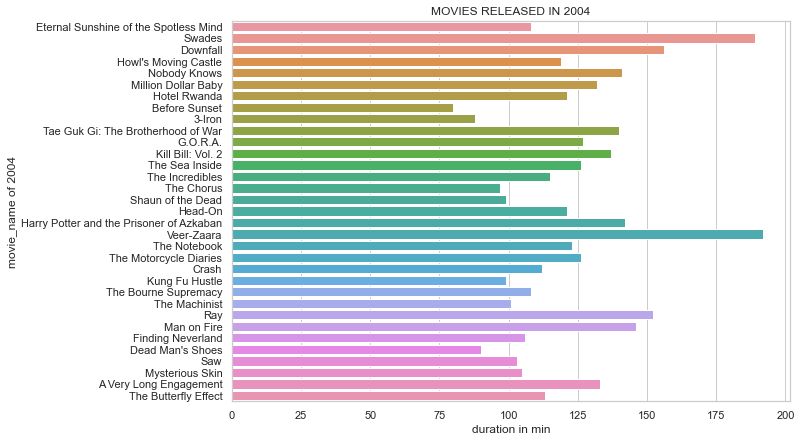

In [83]:
sns.barplot( y="movie_name of 2004" , x="duration" ,data = year_with_most_movie_list_and_duration )
plt.title("MOVIES RELEASED IN 2004")
plt.xlabel("duration in min")

# DURATION ANALYSIS

In [84]:
df_imdb.head()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2396103
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1659703
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,79558
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2357666
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,https://m.media-amazon.com/images/S/sash/4Fyxw...,1153712


## DURATION VS NUMBER OF MOVIES 

In [85]:
duration_vs_no_of_movies = df_imdb['duration(min)'].value_counts().to_frame().rename_axis("duration in min").reset_index().rename(columns={"duration(min)":"no of movies"})

duration_vs_no_of_movies

,duration in min,no of movies
0,130,24
1,100,22
2,129,22
3,113,22
4,101,21
...,...,...
134,174,1
135,175,1
136,177,1
137,184,1


In [86]:
duration_vs_no_of_movies.sort_values("no of movies" , ascending=False).head(10)

,duration in min,no of movies
0,130,24
2,129,22
3,113,22
1,100,22
4,101,21
5,102,20
6,122,20
7,110,19
9,118,18
10,120,18


## top 10 duration with the maximum number of movies

Text(0.5, 1.0, 'top 10 duration with the maximum number of movies')

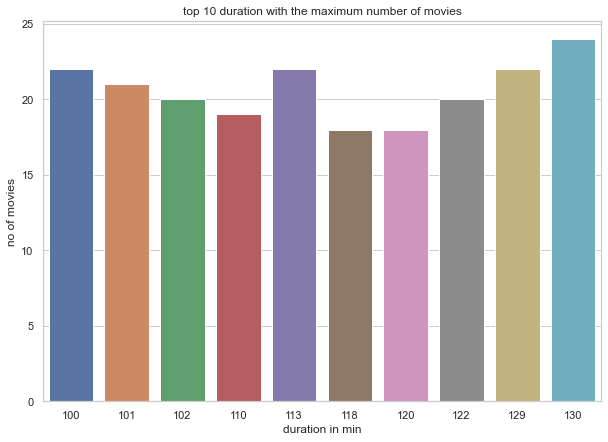

In [87]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='duration in min' , y='no of movies' ,data=duration_vs_no_of_movies.sort_values("no of movies",ascending=False).head(10))
plt.title("top 10 duration with the maximum number of movies")

Text(0.5, 1.0, 'PIE CHART -- Duration(min) vs no of movies ')

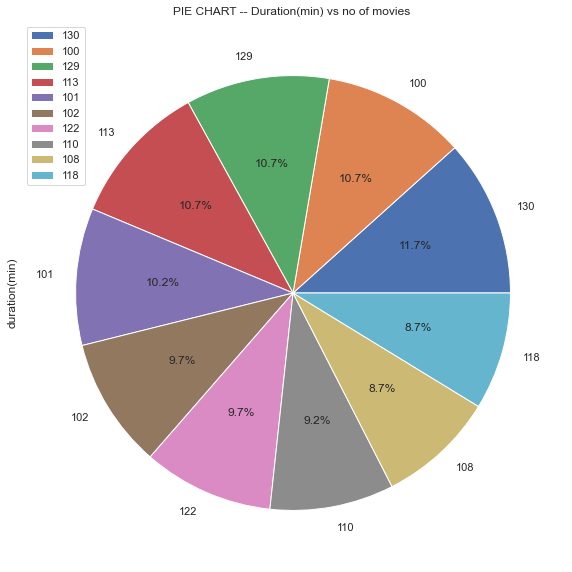

In [88]:

df_imdb["duration(min)"].value_counts().head(10).plot.pie(autopct='%1.1f%%' , figsize=(10,10))
plt.legend()
plt.title("PIE CHART -- Duration(min) vs no of movies ")

## histogram of duration in min

C:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency of movies')

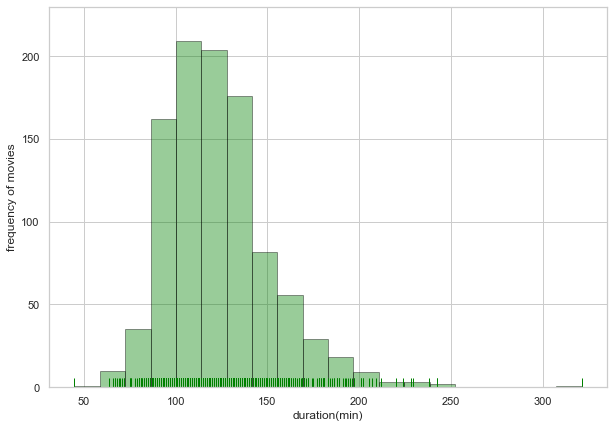

In [89]:
sns.distplot(df_imdb['duration(min)'], hist=True, kde=False, color ='green', bins=20, rug=True,
             hist_kws={'edgecolor':'black'})
plt.ylabel("frequency of movies")

C:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


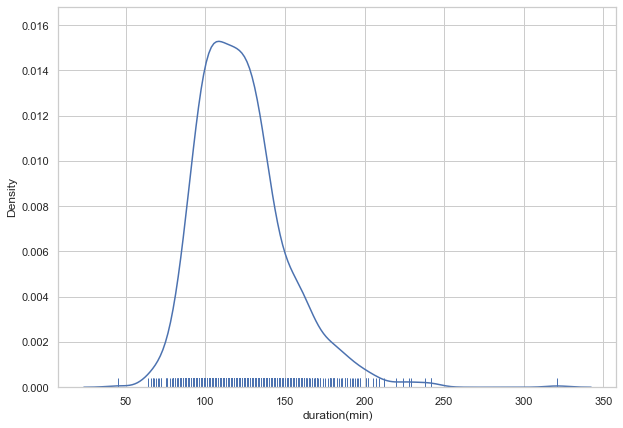

In [90]:
sns.distplot(df_imdb['duration(min)'], hist=False, rug=True);

## TOP TEN MOVIES WITH DURATION 

<AxesSubplot:xlabel='duration(min)', ylabel='movie-name'>

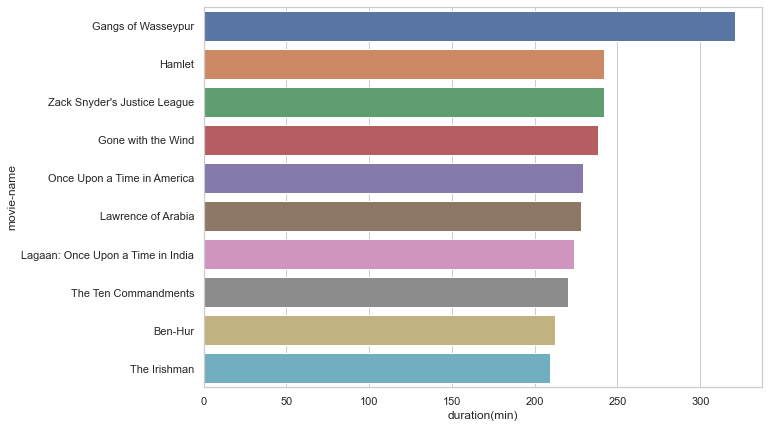

In [92]:
top_ten_movie_with_highest_time = df_imdb.sort_values("duration(min)" , ascending=False).head(10)
sns.barplot(y="movie-name" , x="duration(min)" , data=top_ten_movie_with_highest_time )

## TEN MOVIES WITH LEAST DURATION 

<AxesSubplot:xlabel='duration(min)', ylabel='movie-name'>

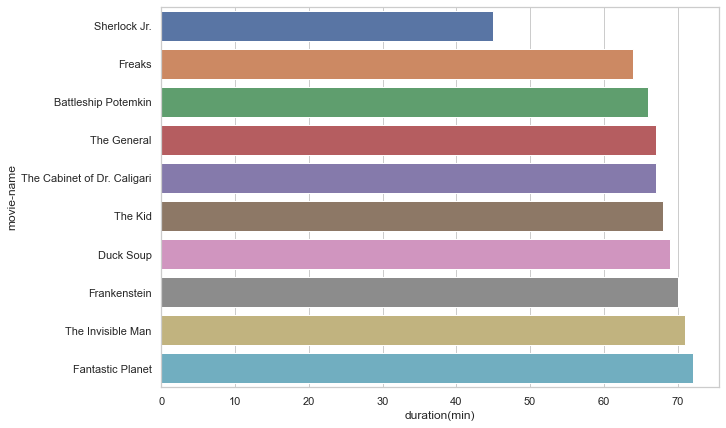

In [93]:
ten_movie_with_LOWEST_time = df_imdb.sort_values("duration(min)" , ascending=True).head(10)
sns.barplot(y="movie-name" , x="duration(min)" , data=ten_movie_with_LOWEST_time )

0      The Shawshank Redemption
1                 The Godfather
2               Soorarai Pottru
3               The Dark Knight
4        The Godfather: Part II
                 ...           
995      Breakfast at Tiffany's
996                       Giant
997                       Shane
998       From Here to Eternity
999                    Lifeboat
Name: movie-name, Length: 1000, dtype: object

# ANALYSIS BASED ON GENRES

In [ ]:
df_imdb.head()

In [273]:
df_genre_count = df_imdb.genre.value_counts().reset_index().rename(columns={"index":"genre" , "genre":"count"})
df_genre_count.head()

,genre,count
0,Drama,88
1,"Comedy, Drama",36
2,"Drama, Romance",36
3,"Action, Crime, Drama",29
4,"Comedy, Drama, Romance",29


Text(0.5, 1.0, 'GENRE vs NUMBER OF MOVIES')

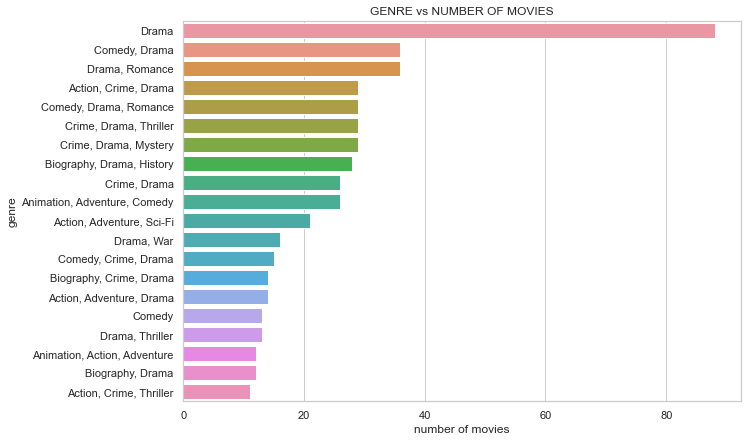

In [278]:
sns.barplot( x="count" , y='genre' , data=df_genre_count.head(20))
plt.xlabel("number of movies")
plt.title("GENRE vs NUMBER OF MOVIES")

## analysis for movies with genre DRAMA only

In [244]:
df_no_of_movies_drama = df_imdb['genre'].str.contains("Drama").fillna(False)
print('Number of movies with Drama','=',len(df_imdb[df]))

Number of movies with Drama = 721


In [212]:
df_movies_with_genre_drama = df_imdb[df].year.value_counts().to_frame().rename_axis("yr").reset_index().rename(columns={"year":"count"})
df_movies_with_genre_drama.head()

,yr,count
0,2013,25
1,2006,24
2,2004,24
3,2007,22
4,2016,22


<AxesSubplot:xlabel='yr', ylabel='count'>

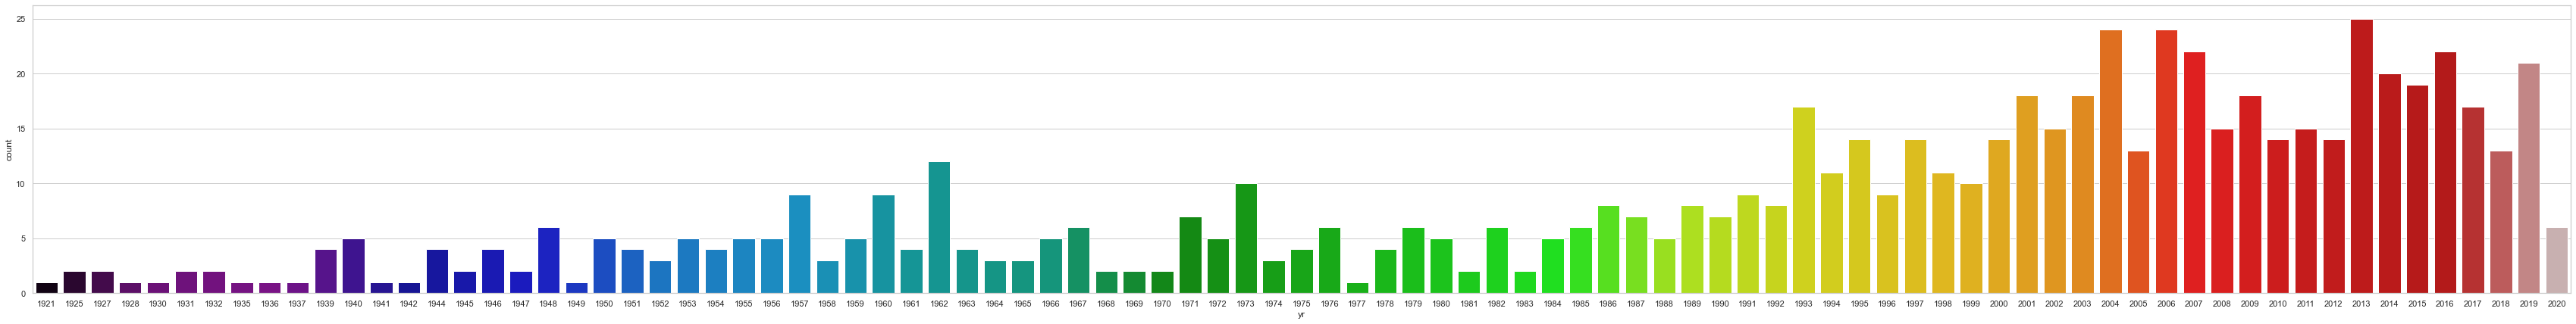

In [242]:
fig, ax = plt.subplots(figsize=(60,7))
sns.barplot(x="yr" , y="count" , data=df_movies_with_genre_drama ,palette="nipy_spectral" )

## Ten years with the most number of movies having genre as drama

Text(0, 0.5, 'number of movies')

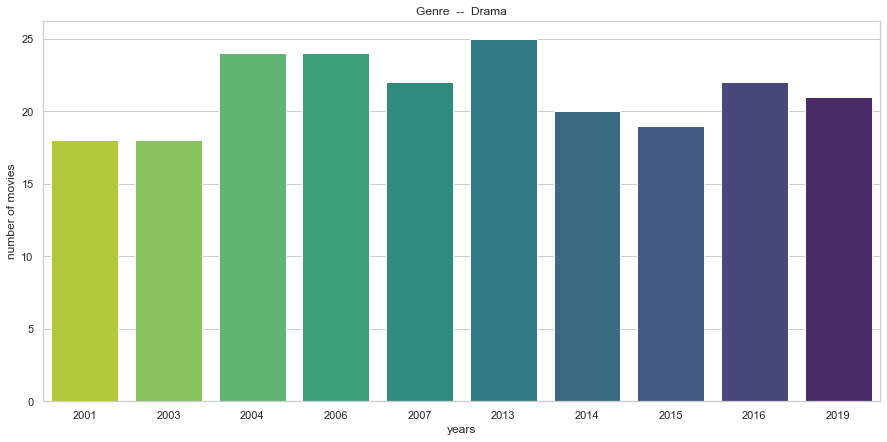

In [240]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x="yr" , y="count" , data=df_movies_with_genre_drama.head(10) ,palette="viridis_r" )
plt.title("Genre  --  Drama")
plt.xlabel("years")
plt.ylabel("number of movies")

# RATING ANALYSIS

In [279]:
df_imdb.head()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2396103
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1659703
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,79558
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2357666
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,https://m.media-amazon.com/images/S/sash/4Fyxw...,1153712


## movies with rating greater than equal 9.0

In [433]:
movies_greater_than_nine = df_imdb.query('rating >=9')
movies_greater_than_nine

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2396103
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1659703
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,79558
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2357666
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,https://m.media-amazon.com/images/S/sash/4Fyxw...,1153712
5,12 Angry Men,1957,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,https://m.media-amazon.com/images/S/sash/4Fyxw...,706583


<AxesSubplot:xlabel='movie-name'>

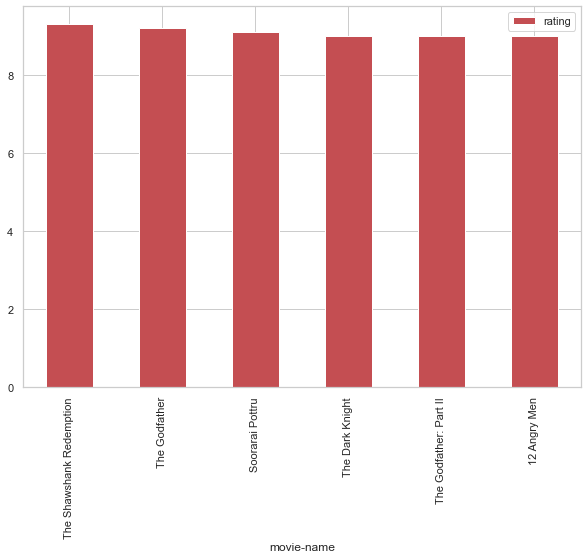

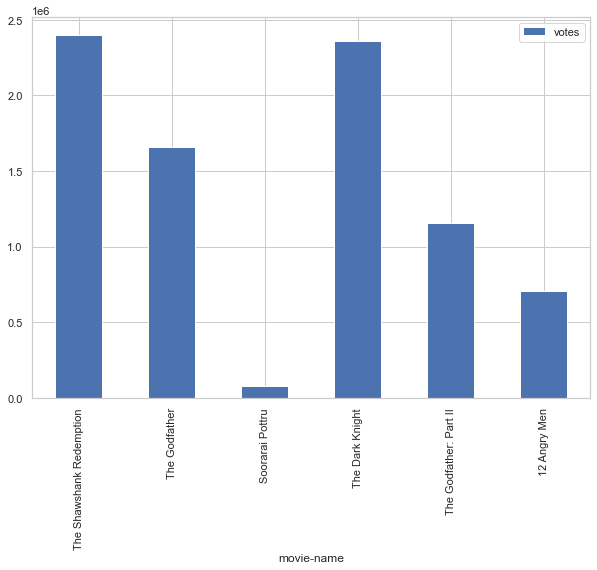

In [432]:
movies_greater_than_nine.plot.bar(x="movie-name" , y="rating" , color="r")
movies_greater_than_nine.plot.bar(x="movie-name" , y="votes")

<AxesSubplot:xlabel='rating', ylabel='movie-name'>

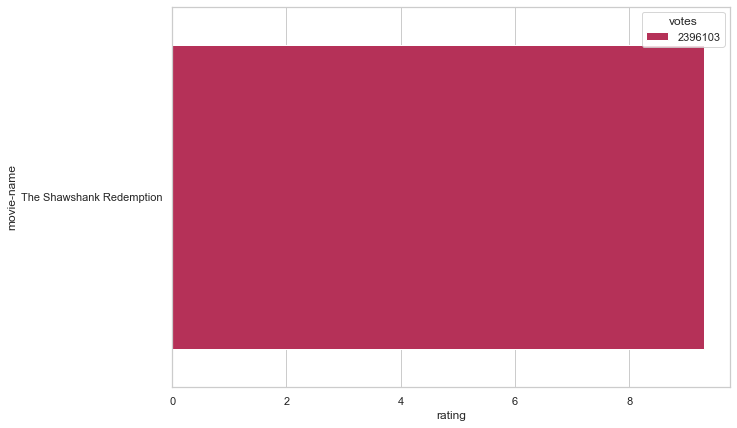

In [371]:
sns.barplot( y="movie-name" , x="rating" ,hue="votes", data=df_imdb[df_imdb.rating == df_imdb.rating.max()] , palette="rocket"  )

## histograph of rating 

C:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


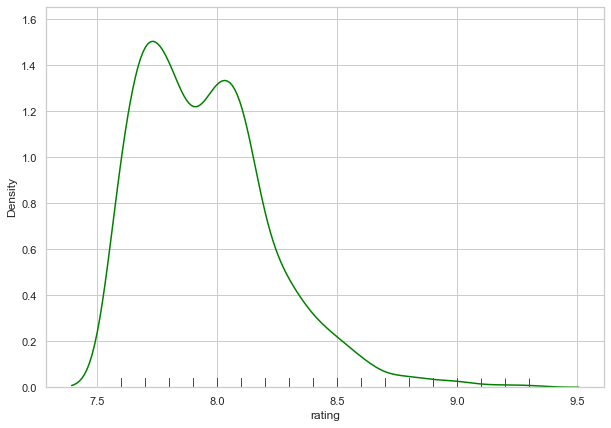

In [322]:
sns.distplot(df_imdb['rating'] ,hist=False, color ='green', bins=20, rug=True);

In [408]:
df_count_rating = df_imdb.rating.value_counts().to_frame().reset_index().rename(columns={"index":"rating" , "rating":"count"})
df_count_rating.head(10)

,rating,count
0,7.7,164
1,7.8,145
2,8.0,139
3,8.1,138
4,7.6,113
5,7.9,107
6,8.2,64
7,8.3,46
8,8.4,30
9,8.5,22


Text(0, 0.5, 'number of movies')

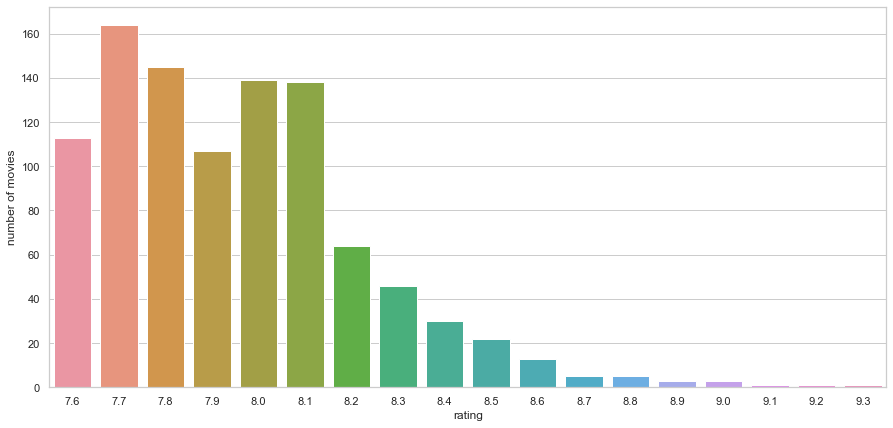

In [558]:
fig ,ax = plt.subplots(figsize=(15,7))
sns.barplot(x="rating" , y="count", data=df_count_rating)
plt.ylabel("number of movies")

C:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

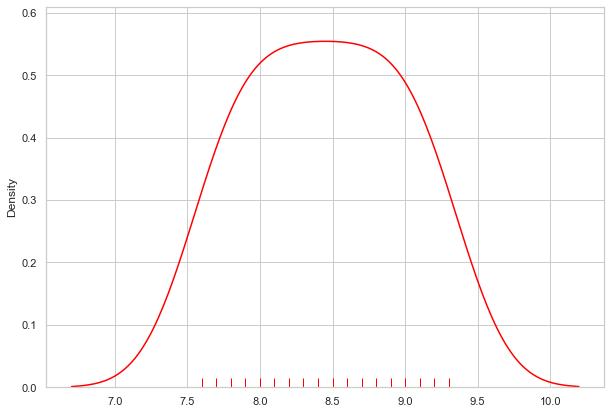

In [393]:
sns.distplot(x=df_count_rating['rating'] , hist=False, color ='red', bins=20, rug=True)



# DIRECTOR ANALYSIS 

In [434]:
df_imdb.head()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2396103
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1659703
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,79558
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2357666
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,https://m.media-amazon.com/images/S/sash/4Fyxw...,1153712


## top 10 director with the most number of movies

In [538]:
df_top_director = df_imdb.director.value_counts().reset_index().rename(columns={"index":"director" , "director":"count"})
df_top_director.head()

,director,count
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Akira Kurosawa,10
4,Martin Scorsese,10


## Top ten director with the most number of movies

Text(0.5, 1.0, 'TOP TEN DIRECTORS WITH THE MOST NUMBER OF MOVIES')

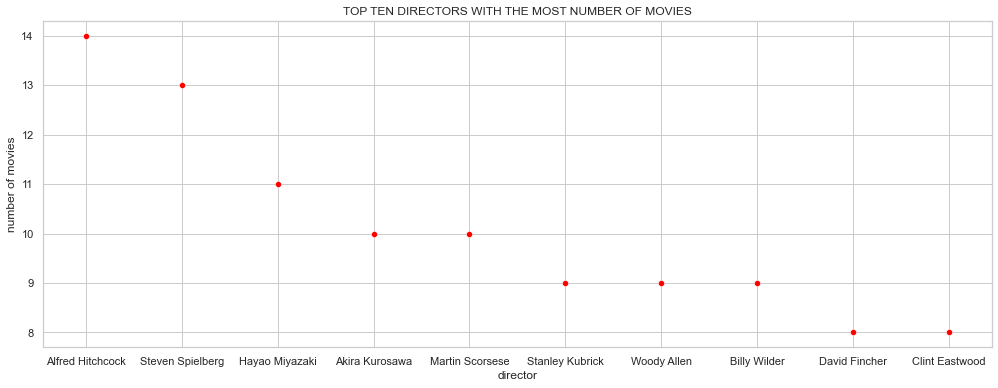

In [557]:
fig ,ax = plt.subplots(figsize=(17,6))
sns.scatterplot(y="count" , x="director"  , data=df_top_director.head(10) , color="red")
plt.ylabel("number of movies")
plt.title("TOP TEN DIRECTORS WITH THE MOST NUMBER OF MOVIES")

## Moives by Director having the highest number of moives

In [620]:
df_top_director.head(1)

,director,count
0,Alfred Hitchcock,14


In [624]:
df_AH = df_imdb[df_imdb.director=="Alfred Hitchcock"]
df_copied_df_AH = df_AH.copy()
df_cleaned_AH = df_copied_df_AH.drop(['overview' ,'director' , 'image_url' ] , axis=1)

In [632]:
print( "\n\n\t\t\t\tMOVIES DIRECTED BY Alfred Hitchcock")
print(tabulate(df_cleaned_AH, headers = 'keys', tablefmt = 'fancy_grid' , showindex="never"))



				MOVIES DIRECTED BY Alfred Hitchcock
╒══════════════════════╤════════╤═════════════════╤══════════════════════════════╤══════════╤═════════╕
│ movie-name           │   year │   duration(min) │ genre                        │   rating │   votes │
╞══════════════════════╪════════╪═════════════════╪══════════════════════════════╪══════════╪═════════╡
│ Psycho               │   1960 │             109 │ Horror, Mystery, Thriller    │      8.5 │  615847 │
├──────────────────────┼────────┼─────────────────┼──────────────────────────────┼──────────┼─────────┤
│ Rear Window          │   1954 │             112 │ Mystery, Thriller            │      8.5 │  452313 │
├──────────────────────┼────────┼─────────────────┼──────────────────────────────┼──────────┼─────────┤
│ North by Northwest   │   1959 │             136 │ Adventure, Mystery, Thriller │      8.3 │  303958 │
├──────────────────────┼────────┼─────────────────┼──────────────────────────────┼──────────┼─────────┤
│ Vertigo             

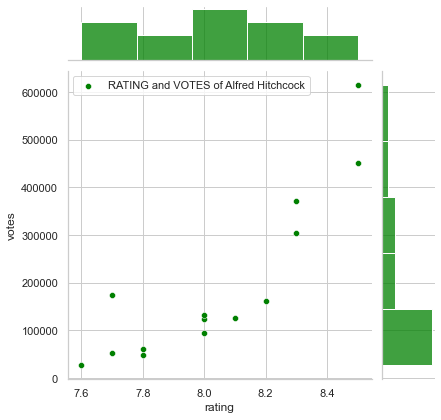

In [637]:
sns.jointplot(x="rating" , y="votes" , data=df_cleaned_AH , color="green" , label="RATING and VOTES of Alfred Hitchcock")

## Moives by Christopher Nolan

In [464]:
no_of_movie_by_CN = df_imdb.director.value_counts()["Christopher Nolan"]
print(f"Number of movies Directed by Christopher Nolan :  {no_of_movie_by_CN}"  )

Number of movies Directed by Christopher Nolan :  8


In [497]:
df_CN = df_imdb[df_imdb.director=="Christopher Nolan"]
df_copied_df_CN = df_CN.copy()

In [527]:
df_cleaned = df_copied_df_CN.drop(['overview' ,'director' , 'image_url' ] , axis=1)

In [529]:
from tabulate import tabulate
print( "\n\n\t\t\t\tMOVIES DIRECTED BY CHRISTOPHER NOLAN")
print(tabulate(df_cleaned, headers = 'keys', tablefmt = 'fancy_grid' , showindex="never"))



				MOVIES DIRECTED BY CHRISTOPHER NOLAN
╒═══════════════════════╤════════╤═════════════════╤═══════════════════════════╤══════════╤═════════╕
│ movie-name            │   year │   duration(min) │ genre                     │   rating │   votes │
╞═══════════════════════╪════════╪═════════════════╪═══════════════════════════╪══════════╪═════════╡
│ The Dark Knight       │   2008 │             152 │ Action, Crime, Drama      │      9   │ 2357666 │
├───────────────────────┼────────┼─────────────────┼───────────────────────────┼──────────┼─────────┤
│ Inception             │   2010 │             148 │ Action, Adventure, Sci-Fi │      8.8 │ 2115635 │
├───────────────────────┼────────┼─────────────────┼───────────────────────────┼──────────┼─────────┤
│ Interstellar          │   2014 │             169 │ Adventure, Drama, Sci-Fi  │      8.6 │ 1560239 │
├───────────────────────┼────────┼─────────────────┼───────────────────────────┼──────────┼─────────┤
│ The Prestige          │   2006 │     

# VOTES ANALYSIS

## TOP TEN MOVIES WITH THE HIGHEST NUMBER OF VOTES


In [575]:
df_votes = df_imdb.sort_values('votes' , ascending=False).copy()
df_copied_for_votes = df_votes.drop(["overview" , "image_url" , 'genre'] , axis=1)
print( "\n\n\t\t\t\t\tTOP TEN MOVIES WITH THE HIGHEST NUMBER OF VOTES")
print(tabulate(df_copied_for_votes[:10], headers = 'keys', tablefmt = 'fancy_grid' , showindex="never"))



					TOP TEN MOVIES WITH THE HIGHEST NUMBER OF VOTES
╒═══════════════════════════════════════════════════╤════════╤═════════════════╤══════════╤══════════════════════╤═════════╕
│ movie-name                                        │   year │   duration(min) │   rating │ director             │   votes │
╞═══════════════════════════════════════════════════╪════════╪═════════════════╪══════════╪══════════════════════╪═════════╡
│ The Shawshank Redemption                          │   1994 │             142 │      9.3 │ Frank Darabont       │ 2396103 │
├───────────────────────────────────────────────────┼────────┼─────────────────┼──────────┼──────────────────────┼─────────┤
│ The Dark Knight                                   │   2008 │             152 │      9   │ Christopher Nolan    │ 2357666 │
├───────────────────────────────────────────────────┼────────┼─────────────────┼──────────┼──────────────────────┼─────────┤
│ Inception                                         │   2010 │        

Text(0.5, 1.0, 'TOP TEN MOVIES WITH THE HIGHEST NUMBER OF VOTES')

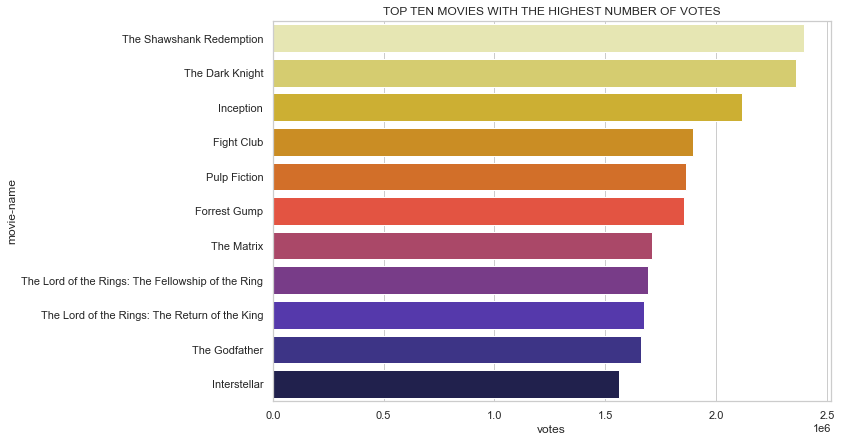

In [604]:
ax = plt.subplots(figsize=(10,7))
sns.barplot(y="movie-name", x="votes", data=df_copied_for_votes[:11] , palette="CMRmap_r");
plt.title("TOP TEN MOVIES WITH THE HIGHEST NUMBER OF VOTES")

In [605]:
df_imdb.head()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2396103
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1659703
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,79558
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2357666
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,https://m.media-amazon.com/images/S/sash/4Fyxw...,1153712


## top ten movies with highest rating and votes

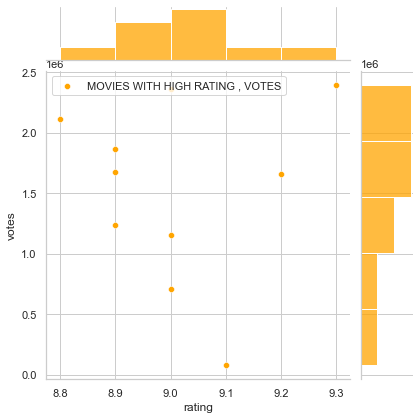

In [341]:
sns.jointplot(x="rating", y="votes", data=df_imdb.head(10) , color="orange" , label="MOVIES WITH HIGH RATING , VOTES");